In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# pip install lifelines
# import lifelines
# pip.main(['install','lifelines'])

In [5]:
import pandas as pd
# Loading the the survival un-employment data
patient = pd.read_csv("D:/Data science/DataSets/Patient.csv")

In [6]:
patient

,PatientID,Followup,Eventtype,Scenario
0,John,1.0,1,A
1,Jess,2.0,1,A
2,Ann,3.0,0,A
3,Mary,4.0,0,A
4,Frank,5.0,1,A
5,Steven,6.0,1,A
6,Andy,6.2,1,A
7,Elizabeth,8.0,0,A
8,Joe,9.0,1,A
9,Kate,10.0,0,A


In [7]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  10 non-null     object 
 1   Followup   10 non-null     float64
 2   Eventtype  10 non-null     int64  
 3   Scenario   10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


In [8]:
patient.describe()

,Followup,Eventtype
count,10.000000,10.000000
mean,5.420000,0.600000
std,2.993994,0.516398
min,1.000000,0.000000
25%,3.250000,0.000000
50%,5.500000,1.000000
75%,7.550000,1.000000
max,10.000000,1.000000


In [ ]:
patient["Followup"].describe()

count    10.000000
mean      5.420000
std       2.993994
min       1.000000
25%       3.250000
50%       5.500000
75%       7.550000
max      10.000000
Name: Followup, dtype: float64

In [10]:
# Spell is referring to time 
T = patient.Followup
T

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     6.2
7     8.0
8     9.0
9    10.0
Name: Followup, dtype: float64

In [11]:
# Importing the KaplanMeierFitter model to fit the survival analysis
from lifelines import KaplanMeierFitter

In [12]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

In [13]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T, event_observed=patient.Eventtype)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

<AxesSubplot:xlabel='timeline'>

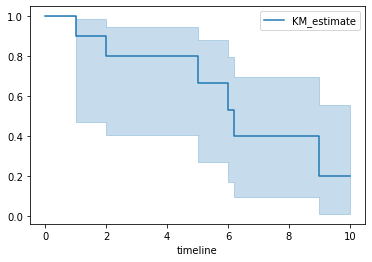

In [14]:
# Time-line estimations plot 
kmf.plot()

In [15]:
# Over Multiple groups 
# For each group, here group is ui
patient.Eventtype.value_counts()

1    6
0    4
Name: Eventtype, dtype: int64

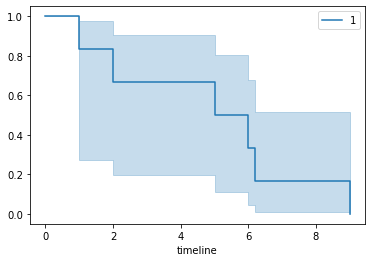

In [16]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[patient.Eventtype==1], patient.Eventtype[patient.Eventtype==1], label='1')
ax = kmf.plot()

In [17]:
# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[patient.Eventtype==0], patient.Eventtype[patient.Eventtype==0], label='0')
kmf.plot(ax=ax)

<AxesSubplot:xlabel='timeline'>